In [ ]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
AUSTIN_311_FILE = '/content/drive/MyDrive/Citadel Datathon/Final_City_Comparison_Datasets/Austin_311_clean.csv'
AUSTIN_COV_FILE = '/content/drive/MyDrive/Citadel Datathon/Final_City_Comparison_Datasets/Austin_COVID.csv'
DC_311_FILE = '/content/drive/MyDrive/Citadel Datathon/Final_City_Comparison_Datasets/DC_311_clean.csv'
DC_COV_FILE = '/content/drive/MyDrive/Citadel Datathon/Final_City_Comparison_Datasets/DC_COVID-19_Cases_by_Ward.csv'

dc_311 = pd.read_csv(DC_311_FILE, low_memory=False)
au_311 = pd.read_csv(AUSTIN_311_FILE, low_memory=False)
au_cov = pd.read_csv(AUSTIN_COV_FILE, low_memory=False)
dc_cov = pd.read_csv(DC_COV_FILE, low_memory=False)

In [ ]:
dc_311.head()

,Unnamed: 0,complaint_type,description,agency,create_time,close_time,create_ordinal,due_time,status,ward
0,0,dmv - drivers license/id,SWMA- Solid Waste Management Admistration,DPW,2021-01-01 05:32:05,2021-01-06 15:34:42,737791,2021-01-06 23:59:00,Closed,5.0
1,1,dmv - drivers license/id,SWMA- Solid Waste Management Admistration,DPW,2021-01-01 05:06:02,2021-01-01 05:07:01,737791,2021-01-09 04:59:00,Voided,8.0
2,2,dmv - drivers license/id,Transportation Operations Administration,DDOT,2021-01-01 05:33:08,2021-01-05 05:55:04,737791,2021-01-12 05:33:08,Closed,4.0
3,3,dmv - drivers license/id,SWMA- Solid Waste Management Admistration,DPW,2021-01-01 11:58:18,2021-01-04 12:54:36,737791,2021-01-05 04:59:00,Closed,7.0
4,4,dmv - drivers license/id,Transportation Operations Administration,DDOT,2021-01-01 06:05:25,2021-01-26 21:40:13,737791,2021-01-12 06:05:25,Closed,3.0


In [ ]:
au_311.head() # may concider removing outliers

,Unnamed: 0,complaint_type,create_time,close_time,create_ordinal,status,ward,channel
0,0,animal - proper care,2019-03-14 03:02:15,2020-11-23 01:41:21,737132,Closed,TRAVIS,Phone
1,1,tree issue row,2020-04-07 07:06:32,2020-11-23 12:02:05,737522,Closed,TRAVIS,Mobile Device
2,2,pothole repair,2020-02-12 01:55:04,2020-02-12 12:57:35,737467,Closed,TRAVIS,Web
3,3,arr dead animal collection,2019-12-10 02:17:04,2019-12-11 09:57:54,737403,Closed,TRAVIS,Phone
4,4,austin code - request code officer,2019-12-10 02:51:24,2019-12-10 03:00:05,737403,Closed,TRAVIS,Phone


In [ ]:
# Change to datetime variables
dc_311.create_time = pd.to_datetime(dc_311.create_time).dt.normalize()
dc_311.close_time = pd.to_datetime(dc_311.close_time).dt.normalize()
dc_311['DAYTILLFIX'] = (dc_311['close_time'] - dc_311['create_time']).dt.days
#dc_311['STARTYEAR'] = pd.DatetimeIndex(dc_311['create_time']).year
#dc_311['ENDYEAR'] = pd.DatetimeIndex(dc_311['close_time']).year

au_311.create_time = pd.to_datetime(au_311.create_time).dt.normalize() #start from 01/01/2014 to 03/14/2022
au_311.close_time = pd.to_datetime(au_311.close_time).dt.normalize()
au_311['DAYTILLFIX'] = (au_311.close_time - au_311.create_time).dt.days
#au_311['STARTYEAR'] = pd.DatetimeIndex(au_311['Created Date']).year
#au_311['ENDYEAR'] = pd.DatetimeIndex(au_311['Close Date']).year

In [ ]:
au_cov['total'] = au_cov.iloc[:, 1:33].sum(axis=1)

Why do we want to group the data into 3 parts?

Take for example the data for Austin, Texas:

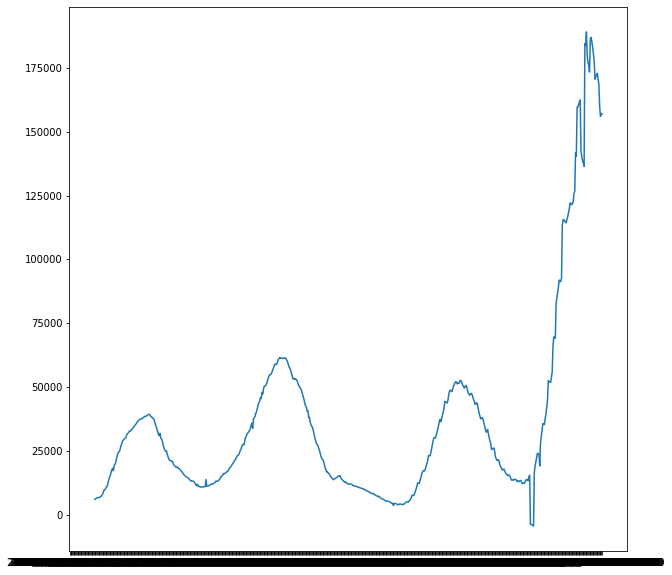

In [ ]:
au_cov[au_cov.total == 0] = au_cov[au_cov.total == 0].replace(0, np.nan)
au_cov.fillna(method='bfill', inplace=True)

x = au_cov.Last_Updat
y = au_cov.total.rolling(60).sum().diff() #smooth data
plt.figure(figsize=(10,10))
plt.plot(x,y)
plt.show()

#11-2020
#08-2021
#12-2021

In [ ]:
dc = dc_311[dc_311.close_time.notna()]
au = au_311[au_311.close_time.notna()]
# measure from create time
def strain_type(df):
  df['C19'] = ((df['create_time'] > '2020-03-01') & (df['create_time'] < '2020-11-01')).astype(int)
  df['DELTA'] = ((df['create_time'] >= '2020-11-01') & (df['create_time'] < '2021-08-01')).astype(int)
  df['OMI'] = (df['create_time'] >= '2021-08-01').astype(int)
strain_type(dc)
strain_type(au)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

Can include Agency variable for NY and DC if we want to use them (for consistancy I will leave it out for now). And instead use complaint type.

In [ ]:
volume_dc = dc.groupby('create_time')['Unnamed: 0'].count().to_frame().reset_index()
volume_dc = volume_dc.rename({'create_time': 'create_time', 'Unnamed: 0': 'Volume'}, axis=1)
volume_dc.create_time = pd.to_datetime(volume_dc.create_time).dt.normalize()
dc = dc.join(volume_dc.set_index('create_time'), on='create_time')

In [ ]:
volume_au = au.groupby('create_time')['Unnamed: 0'].count().to_frame().reset_index()
volume_au = volume_au.rename({'create_time': 'create_time', 'Unnamed: 0': 'Volume'}, axis=1)
volume_au.create_time = pd.to_datetime(volume_au.create_time).dt.normalize()
au = au.join(volume_au.set_index('create_time'), on='create_time')

In [ ]:
import statsmodels.api as sm
#change the variables as you like
X = au[['complaint_type', 'C19', 'DELTA', 'OMI', 'Volume']]
X = pd.get_dummies(data=X, drop_first=True)
y = au[['DAYTILLFIX']]
est = sm.OLS(y, X).fit()
est.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             DAYTILLFIX   R-squared (uncentered):                   0.181
Model:                            OLS   Adj. R-squared (uncentered):              0.181
Method:                 Least Squares   F-statistic:                              7386.
Date:                Sun, 27 Mar 2022   Prob (F-statistic):                        0.00
Time:                        06:55:25   Log-Likelihood:                     -5.2701e+06
No. Observations:              868879   AIC:                                  1.054e+07
Df Residuals:                  868853   BIC:                                  1.054e+07
Df Model:                          26                                                  
Covariance Type:            nonrobust                                                  
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
C19                                                  -13.9496      0.407    -34.285      0.000     -14.747     -13.152
DELTA                                                -16.3539      0.376    -43.437      0.000     -17.092     -15.616
OMI                                                  -27.8584      0.453    -61.521      0.000     -28.746     -26.971
Volume                                                 0.0120      0.001     15.444      0.000       0.010       0.013
complaint_type_animal - proper care                   58.2668      0.912     63.877      0.000      56.479      60.055
complaint_type_animal control - assistance request    83.7571      0.545    153.558      0.000      82.688      84.826
complaint_type_arr brush and bulk                     31.1308      0.871     35.724      0.000      29.423      32.839
complaint_type_arr dead animal collection              2.2595      0.533      4.242      0.000       1.216       3.303
complaint_type_arr missed recycling                   11.8130      0.516     22.885      0.000      10.801      12.825
complaint_type_arr missed yard trimmings /organics     4.1110      0.907      4.535      0.000       2.334       5.888
complaint_type_arr missed yard trimmings/compost       7.3427      0.641     11.456      0.000       6.086       8.599
complaint_type_austin code - request code officer      1.7824      0.359      4.969      0.000       1.079       2.485
complaint_type_code compliance                        -0.4013      0.814     -0.493      0.622      -1.996       1.193
complaint_type_debris in street                      130.5568      0.837    155.995      0.000     128.916     132.197
complaint_type_graffiti abatement                     12.9674      0.929     13.952      0.000      11.146      14.789
complaint_type_injured / sick animal                  35.4721      0.579     61.263      0.000      34.337      36.607
complaint_type_loose dog                              70.5592      0.473    149.062      0.000      69.631      71.487
complaint_type_loud commercial music                   5.6523      0.782      7.229      0.000       4.120       7.185
complaint_type_park Maintenance - ground               7.8681      0.682     11.536      0.000       6.531       9.205
complaint_type_parking violation enforcement          14.1084      0.948     14.878      0.000      12.250      15.967
complaint_type_pothole repair                        133.1389      0.709    187.786      0.000     131.749     134.528
complaint_type_public health - graffiti abatement     58.7805      0.879     66.882      0.000      57.058      60.503
complaint

In [ ]:
X = dc[['complaint_type', 'C19', 'DELTA', 'OMI', 'Volume']]
X = pd.get_dummies(data=X, drop_first=True)
y = dc[['DAYTILLFIX']]
est = sm.OLS(y, X).fit()
est.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1755: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             DAYTILLFIX   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     911.4
Date:                Sun, 27 Mar 2022   Prob (F-statistic):               0.00
Time:                        06:57:01   Log-Likelihood:            -1.9483e+06
No. Observations:              400816   AIC:                         3.897e+06
Df Residuals:                  400810   BIC:                         3.897e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
C19                                              0          0        nan        nan           0           0
DELTA                                      18.8593      0.319     59.045      0.000      18.233      19.485
OMI                                        14.1117      0.324     43.535      0.000      13.476      14.747
Volume                                     -0.0013      0.000    -11.175      0.000      -0.002      -0.001
complaint_type_dmv - drivers license/id    -2.8172      0.265    -10.633      0.000      -3.336      -2.298
complaint_type_parking permit             -13.0010      0.376    -34.541      0.000     -13.739     -12.263
complaint_type_yard waste                  -8.0259      0.387    -20.758      0.000      -8.784      -7.268
==============================================================================
Omnibus:                   430472.222   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         27358619.371
Skew:                           5.617   Prob(JB):                         0.00
Kurtosis:                      41.884   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""